# Veri Biliminde Yayılım Ölçüleri(Measures of Spread)

Yayılım ölçüleri, veri kümesindeki değerlerin birbirinden ne kadar farklı veya dağınık olduğunu gösteren istatistiksel ölçülerdir.Merkezi eğilim ölçüleri(ortalama,medyan,mod) verilerin nerede toplandığını gösterirken, yayılım ölçüleri verilerin ne kadar dağınık olduğunu gösterir

## Temel Yayılım Ölçüleri

### 1-)Aralık(Range)

En basit yayılım ölçüsüdür.En büyük değer ile en küçük değer arasındaki farktır

* Aralık= Maksimum Değer - Minimum Değer

### 2-)Çeyrekler Arası Aralık(Interquartile Range-IQR)

Verilerin orta %50 sinin yayılımını gösterir

** IQR=Q3-Q1

* Q1:Birinci çeyrek(25. yüzdelik)
* Q3:Üçüncü çeyrek(75.yüzdelik)

### 3-)Varyans(Variance)

Değerlerin ortalamadan ne kadar saptığını gösterir

** Populasyon Varyansı

$$\sigma^2 = \frac{\sum(x_i - \mu)^2}{N}$$

** Örneklem Varyansı

$$s^2 = \frac{\sum(x_i - \bar{x})^2}{n-1}$$

---------------------------------------------------------

* x_i: Veri noktası
* μ: Populasyon ortalaması
* x̄: Örneklem ortalaması
* N: Populasyon büyüklüğü
* n: Örneklem büyüklüğü

### Standart Sapma(Standard Deviation)

Varyansın kareköküdür.Verilerin ortalamadan ortalama sapmasını gösterir

** Populasyon Standart Sapması

$$\sigma = \sqrt{\sigma^2}$$

** Örneklem Standart Sapması 

$$s = \sqrt{s^2}$$

### Değişim Katsayısı(Coefficent of Variation-CV)

Standart sapmanın ortalamaya oranıdır. Farklı ölçekteki verileri karşılaştırmak için kullanılır

* CV = (Standart Sapma/Ortalama)*100 %

### Mutlak Sapma(Mean Absolute Deviation-MAD)

Değerlerin ortalamadan ortalama mutlak sapmasıdır

$$\text{MAD} = \frac{\sum|x_i - \bar{x}|}{n}$$

# Keşifsel Veri Analizi (EDA) Örneği

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Veri seti oluştur -İki farklı sınıfın sınav sonuçlarını analiz edeceğiz-
np.random.seed(31)
sinif_a=np.random.normal(70,10,50) #ort 70,std 10 olan 50 öğrenci
sinif_b=np.random.normal(70,5,50) #ort 70,std 5, olan 50 öğrenci
# DataFrame oluştur
df=pd.DataFrame({"Sınıf A":sinif_a,
                "Sınıf B":sinif_b})

df.head(4)

,Sınıf A,Sınıf B
0,65.852428,71.932918
1,66.666313,72.845169
2,70.810920,62.866682
3,62.089730,60.845575


In [36]:
#Temek istatistikleri hesapla
print("Temek İstatistikler: ")
print(df.describe())

Temek İstatistikler: 
         Sınıf A    Sınıf B
count  50.000000  50.000000
mean   68.964753  69.052224
std     8.472766   5.930925
min    52.413927  57.897908
25%    63.011688  65.540390
50%    67.581784  68.826840
75%    70.735984  71.785417
max    89.774340  82.838009


In [37]:
# Yayılım Ölçülerini Hesapla
print("Yayılım Ölçüleri: ")
for i in ["Sınıf A","Sınıf B"]:
    data=df[i]
    print(f"\n{i} İstatistikler")

    #Aralık (range)

    data_range=data.max()-data.min()
    print(f"Aralık (range): {data_range:.2f}")

    #Çeyrekler Arası Aralık (IQR)
    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    iqr=Q3-Q1
    print(f"Q1 (25. yüzdelik): {Q1:.2f}")
    print(f"Q3 (75. yüzdelik): {Q3:.2f}")
    print(f"Çeyrekler Arası Aralık: {iqr:.2f}")

    #Varyans
    variance=np.var(data,ddof=1) #ddof=1 örneklem varyansı için
    print(f"Varyans: {variance:.2f}")

    #Standart Sapma
    std_dev=np.std(data,ddof=1) #ddof=1 örneklem standart sapması için
    print(f"Standart Sapma: {std_dev:.2f}")

    #Değişim Katsayısı (CV)
    cv=(std_dev/np.mean(data)) *100
    print(f"Değişim Katsayısı: %{cv:.2f}")

    #Mutlak Sapma(MAD)
    mad=np.mean(np.abs(data-np.mean(data)))
    print(f"Ortalama Mutlak Sapma: {mad:.2f}")

Yayılım Ölçüleri: 

Sınıf A İstatistikler
Aralık (range): 37.36
Q1 (25. yüzdelik): 63.01
Q3 (75. yüzdelik): 70.74
Çeyrekler Arası Aralık: 7.72
Varyans: 71.79
Standart Sapma: 8.47
Değişim Katsayısı: %12.29
Ortalama Mutlak Sapma: 6.40

Sınıf B İstatistikler
Aralık (range): 24.94
Q1 (25. yüzdelik): 65.54
Q3 (75. yüzdelik): 71.79
Çeyrekler Arası Aralık: 6.25
Varyans: 35.18
Standart Sapma: 5.93
Değişim Katsayısı: %8.59
Ortalama Mutlak Sapma: 4.53


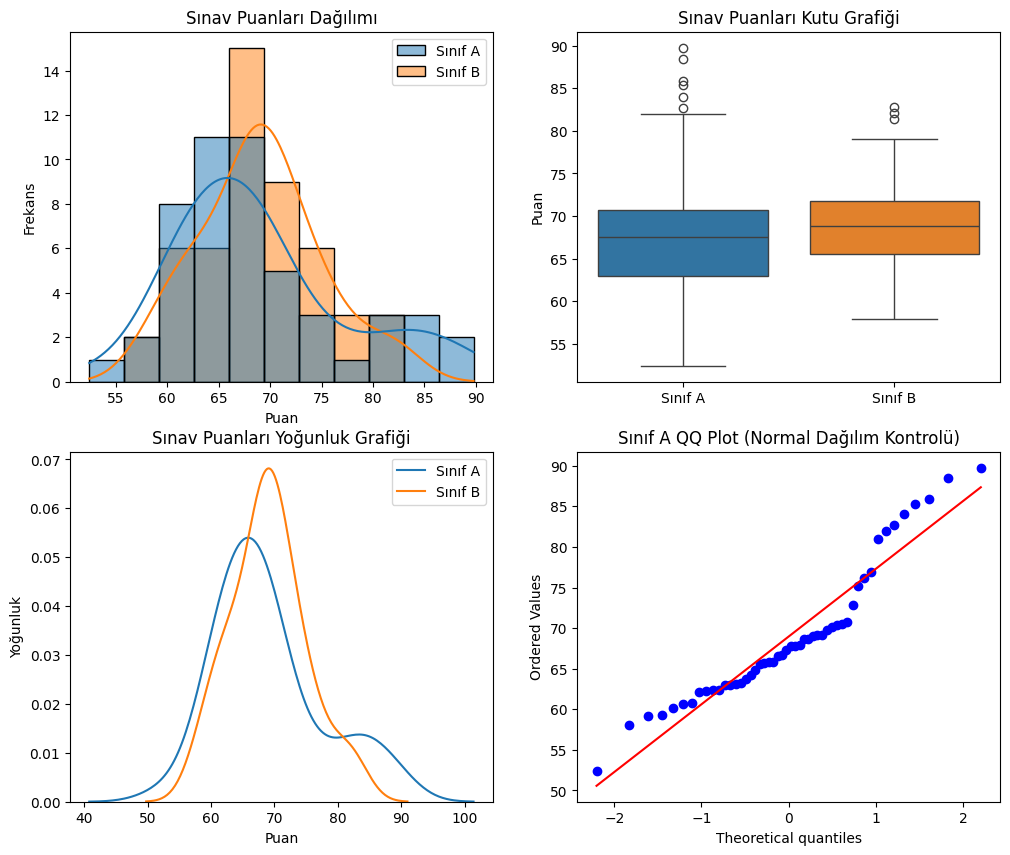

In [38]:
#Görselleştirme
plt.figure(figsize=(12,10))

#Histogram
plt.subplot(2,2,1)
sns.histplot(data=df,kde=True)
plt.title("Sınav Puanları Dağılımı")
plt.xlabel("Puan")
plt.ylabel("Frekans")

#Kutu Grafiği (Box plot)
plt.subplot(2,2,2)
sns.boxplot(data=df)
plt.title("Sınav Puanları Kutu Grafiği")
plt.ylabel("Puan")

# Yoğunluk Grafiği (Density Plot)
plt.subplot(2,2,3)
sns.kdeplot(data=df["Sınıf A"],label="Sınıf A")
sns.kdeplot(data=df["Sınıf B"],label="Sınıf B")
plt.title("Sınav Puanları Yoğunluk Grafiği")
plt.xlabel("Puan")
plt.ylabel("Yoğunluk")
plt.legend()

# QQ Plot  (Normal Dağılıma uygunluk)
plt.subplot(2,2,4)
from scipy import stats
stats.probplot(df["Sınıf A"],plot=plt)
plt.title("Sınıf A QQ Plot (Normal Dağılım Kontrolü)")
plt.show()

In [39]:
# Yayılım ölçülerinin görsel karşılaştırması
spread_measures=pd.DataFrame({
    "Sınıf": ["Sınıf A","Sınıf B"],
    "Standart Sapma":[np.std(df["Sınıf A"],ddof=1),np.std(df["Sınıf B"],ddof=1)],
    "Varyans":[np.var(df["Sınıf A"],ddof=1),np.var(df["Sınıf B"],ddof=1)],
    "IQR":[np.percentile(df["Sınıf A"],75)-np.percentile(df["Sınıf A"],25),
           np.percentile(df["Sınıf B"],75)-np.percentile(df["Sınıf B"],25)],
           "Aralık":[np.max(df["Sınıf A"])-np.min(df["Sınıf A"]),
                     np.max(df["Sınıf B"])-np.min(df["Sınıf B"])]
})

spread_measures

,Sınıf,Standart Sapma,Varyans,IQR,Aralık
0,Sınıf A,8.472766,71.787764,7.724296,37.360413
1,Sınıf B,5.930925,35.175868,6.245028,24.940101


In [40]:
plt.figure(figsize=(10,6))
spread_measures_melted=pd.melt(spread_measures,id_vars=["Sınıf"],
                               value_vars=["Standart Sapma","IQR","Aralık"],
                               var_name="Ölçü",value_name="Değer")
spread_measures_melted

,Sınıf,Ölçü,Değer
0,Sınıf A,Standart Sapma,8.472766
1,Sınıf B,Standart Sapma,5.930925
2,Sınıf A,IQR,7.724296
3,Sınıf B,IQR,6.245028
4,Sınıf A,Aralık,37.360413
5,Sınıf B,Aralık,24.940101


<Figure size 1000x600 with 0 Axes>

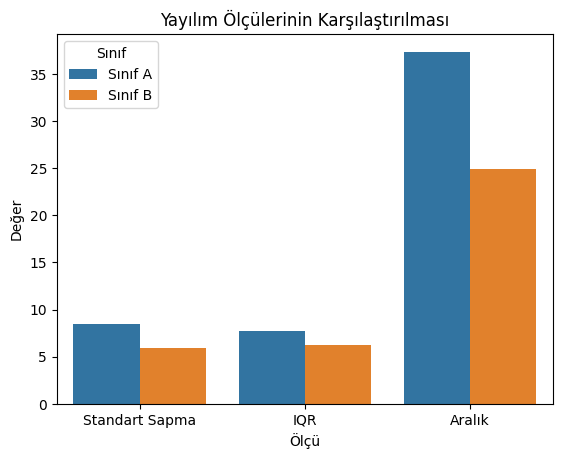

In [41]:
sns.barplot(x="Ölçü",y="Değer",hue="Sınıf",data=spread_measures_melted)
plt.title("Yayılım Ölçülerinin Karşılaştırılması")
plt.show()

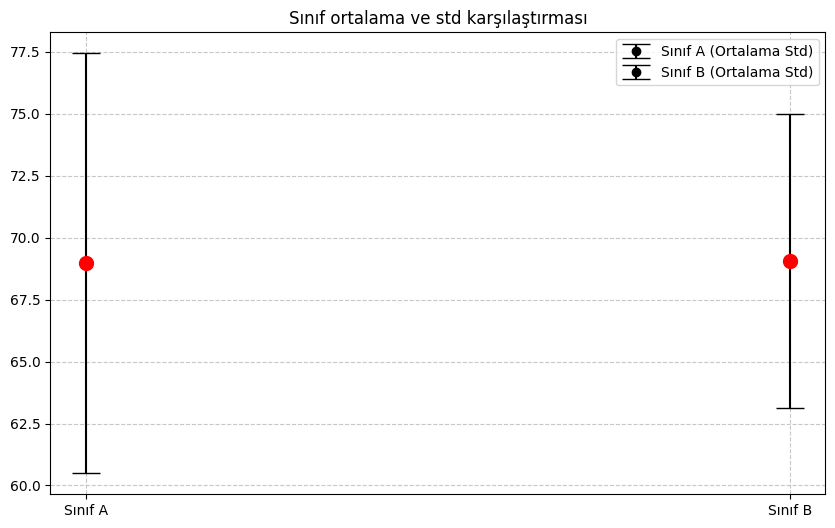

In [43]:
# İki sınıfın standart sapmalarının karşılaştırması için görselleştirme
plt.figure(figsize=(10,6))
for i,sınıf in enumerate(["Sınıf A","Sınıf B"]):
    data=df[sınıf]
    mean=np.mean(data)
    std=np.std(data,ddof=1)

    #Ortalama ve standart sapma aralıklarını göster
    plt.scatter(i,mean,color="red",s=100,zorder=5)
    plt.errorbar(i,mean,yerr=std,fmt="o",capsize=10,color="black",label=f"{sınıf} (Ortalama Std)")

plt.xticks([0,1],["Sınıf A","Sınıf B"])
plt.legend()
plt.title("Sınıf ortalama ve std karşılaştırması")
plt.grid(True,linestyle="--",alpha=0.7)
plt.show()